# End-to-end Machine Learning Project

In this notebook, I will work through an example of a hypothetical data science project. We will be following the steps that are part of the CRISP-DM methodology:

1. Problem description
2. Data acquisition
3. Exploratory data analysis
4. Data preparation
5. Model selection and training
6. Fine-tuning of the model
7. Conclusion

We will skip the Launch and Monitoring steps. 

## 1. Problem description

The Seoul Bike-sharing demand data set is part of the UCI Machine Learning Repository. The data set contains the count of the number of bikes rented at each hour in the Seoul bike-sharing system and information regarding weather conditions.

The final product will consist of a model that predicts the number of bicycles rented in any given day based on the hour and other weather-related variables such as rainfall and humidity. The system's predictions are used to guarantee that available bikes will meet the demand for the service.

## 2. Data acquisition

As mentioned before, the dataset used for this example is hosted by UCI in their Machine Learning Repository. Since we are using a new version of pandas, we can pass the URL into to "read_csv" function, and it will download the dataset for us. The "encoding" argument in the read_csv function is necessary since the data set contains **non-ASCII** characters.

In [1]:
%config Completer.use_jedi = False # Was having issues with aoutocomplete

import pandas as pd
import numpy as np

BIKE_DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"

bike_df = pd.read_csv(BIKE_DATA_URL, encoding= 'unicode_escape')

### 2.1. A quick look at the data

In the table below, we can observe how each row represents a different day. The fourteen various attributes include the date, number of bikes rented on a given day and wheater-related information.

In [2]:
bike_df[:5]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
names = "date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day"
colnames = names.split(",")
bike_df.columns = colnames 

Using the info() method, we get a brief description of the data, in particular, we can observe that the dataset has 8760 rows, and none of the attributes presents missing values. Another observation is that the *Date*, *Seasons*, *Holiday* and *Functioning day* attributes are type object.

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             8760 non-null   object 
 1   bike_count       8760 non-null   int64  
 2   hour             8760 non-null   int64  
 3   temperature      8760 non-null   float64
 4   humidity         8760 non-null   int64  
 5   wind_speed       8760 non-null   float64
 6   visibility       8760 non-null   int64  
 7   dew_point        8760 non-null   float64
 8   solar_radiation  8760 non-null   float64
 9   rainfall         8760 non-null   float64
 10  snowfall         8760 non-null   float64
 11  seasons          8760 non-null   object 
 12  holiday          8760 non-null   object 
 13  functioning_day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


Another way of exploring the dataset is by looking at the value counts for the various attributes; in particular, we want to know more about the *Hour* attribute. In the table below, we have that for each value of the *Hour* we have the same number of observations, this is telling us that the *Rented bike count* is organised by day and hour of the day.

In [5]:
bike_df['hour'].value_counts()

0     365
8     365
15    365
7     365
22    365
14    365
6     365
21    365
13    365
5     365
20    365
12    365
4     365
19    365
11    365
3     365
18    365
10    365
2     365
17    365
9     365
1     365
16    365
23    365
Name: hour, dtype: int64

The *describe()* method returns a summary of the numerical values.

In [6]:
bike_df.describe()

,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Finally, we want to observe the numerical attributes distribution; We achieve this using a histogram. Some of the features that we can notice in hour histograms are:

1. Some of the histograms are tail heavy.
2. All the attributes have different scales.

Both findings tell us that we will require to normalise the attributes further down the project.

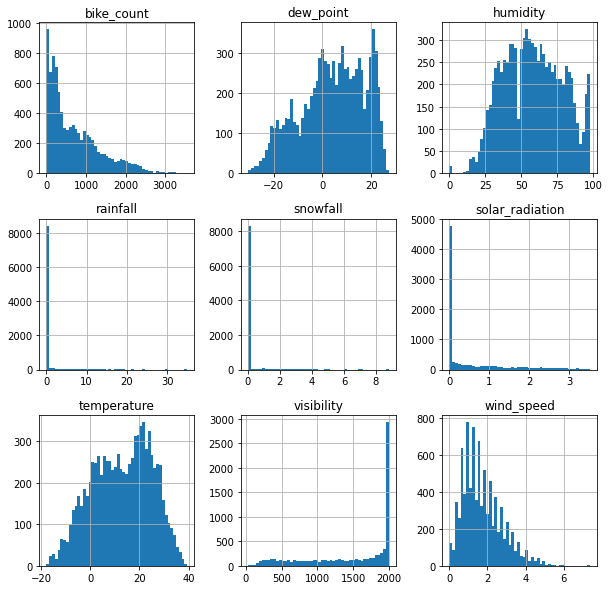

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

bike_df[bike_df.columns.difference(['hour'])].hist(bins=50, figsize=(10,10))
plt.show()

### 2.2 Create a test set

Before we proceed to the EDA and further analyse the data, we need to create a test set, put it aside and don't look at it, the reason for this is because we want to avoid incurring in any *data snooping bias*. For this exercise, we will set aside 20% of our data set. To split the dataset the best and more convenient option is to use the *train_test_split()* function part of Scikit-Learn. It provides various useful features, such as defining a random state and generating balanced samples. The result is that we have a train set with 7008 rows and a test set with 1752 rows. In the following sections, we will be working only with the train set, and we will save the test set to validate our results by the end of the project.

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bike_df, test_size=0.2, random_state=42)

In [9]:
len(train_set), len(test_set)

(7008, 1752)

## 3. EDA

Our first approach to data exploration is going to be through data visualisation. Looking at the results, it seems that the most promising attribute to predict the bike count is the temperature. This result holds up when we look at the coefficient of correlation results presented in the following table.

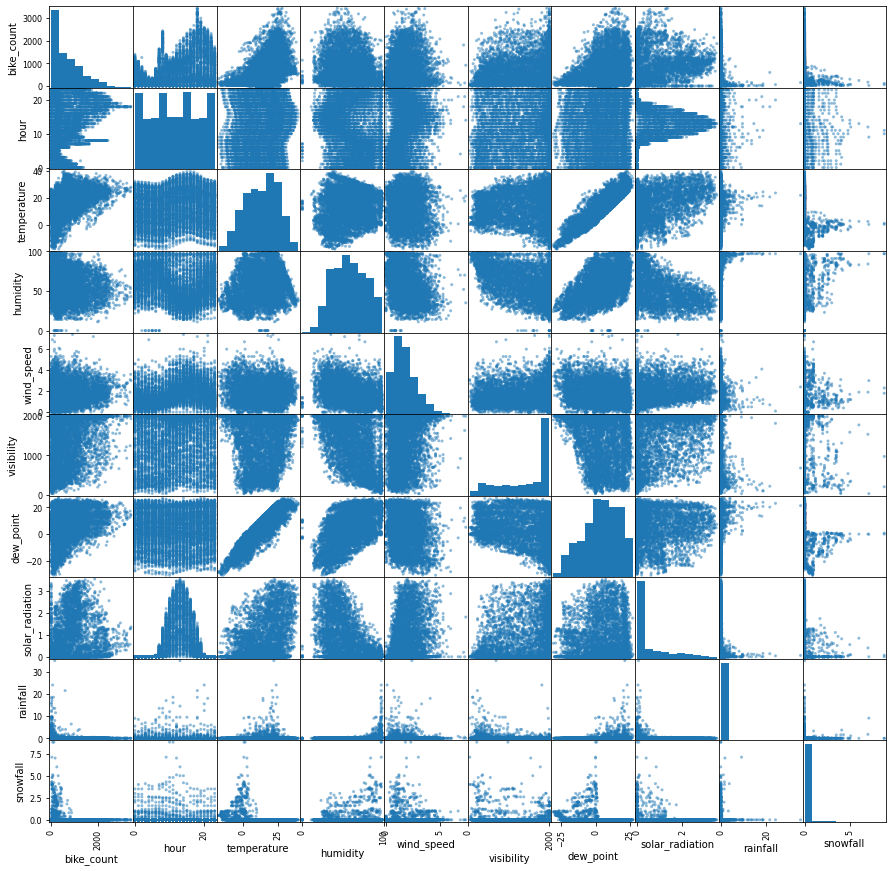

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(15,15))
plt.show()

### 3.2. Correlation matrix

In [11]:
corr_matrix = train_set.corr()
corr_matrix["bike_count"].sort_values(ascending=True)

humidity          -0.202004
snowfall          -0.141440
rainfall          -0.123586
wind_speed         0.121388
visibility         0.204672
solar_radiation    0.258930
dew_point          0.377737
hour               0.418294
temperature        0.537088
bike_count         1.000000
Name: bike_count, dtype: float64

## 4. Data Preparation

Instead of manually preparing the data to be used in machine learning algorithms, we will use different Scikit-Learn's classes. The transformations that we will use can be divided into two groups:

1. Categorical data.
2. Numeric data.

In [12]:
bike = train_set.drop("bike_count", axis=1)
bike_count_labels = train_set["bike_count"].copy()

### 4.1. Categorical data

As observed before, the dataset contains attributes of type object. These attributes include various values, each representing a different category. In this example, we will use *one-hot encoding* to represent different categories.

In [13]:
bike_cat = bike[["hour", "seasons", "holiday", "functioning_day"]]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
bike_cat_encoded = cat_encoder.fit_transform(bike_cat)

cat_encoder.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

### 4.2. Feature scaling

ML algorithms don't perform well when the numerical input attributes have different scales. To solve this issue, we will use a scaling known as *standardisation*. The process consists of first subtracting the mean value and then dividing by the standard deviation. 

In [14]:
bike_num = bike.drop(["date", "hour", "seasons", "holiday", "functioning_day"], axis = 1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

### 4.3. Full pipeline

Finally, we can use Scikit-Learn's *ColumnTransformer* class to execute all the required transformations at once.

In [15]:
from sklearn.compose import ColumnTransformer

num_attribs = list(bike_num)
cat_attribs = list(bike_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

bike_prepared = full_pipeline.fit_transform(bike)

## 5. Model selection and training

First, we have to select an evaluation metric to determine the performance of different models. We use the **RMSE** (root-mean-square error)

### 5.1. Linear regression model: 

Considering that we are tackling a regression problem, a good start is to fit a linear regression model. The RMSE for the training set using a linear model, gave us a value of **375.05**. The result itself is not bad; however, we still need to evaluate how good the "fit" is. When we look at the distribution of the bike count labels vs the model's predictions, we observe that our predictions do not fit the data well.  

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(bike_prepared, bike_count_labels)

from sklearn.metrics import mean_squared_error

bike_count_predictions = lin_reg.predict(bike_prepared)

lin_mse = mean_squared_error(bike_count_labels, bike_count_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

375.0516741408278

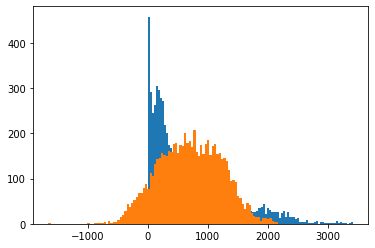

In [17]:
plt.hist(bike_count_labels, bins=100)
plt.hist(bike_count_predictions, bins=100)
plt.show()

### 5.2. Decision Tree regressor

We may want to try a decision tree method since it is useful in finding nonlinear relationships in the data. When observing the results, we get that the RMSE is 0, which is a clear indication of overfitting.

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(bike_prepared, bike_count_labels)

tree_bike_preds = tree_reg.predict(bike_prepared)

tree_mse = mean_squared_error(bike_count_labels, tree_bike_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 5.3. Cross-Validation

Using cross-validation, we obtain a model that is no longer overfitting the data (RMSE 325), which is a sign of improvement. In the following step, we will attempt to reduce the **RMSE** even further.

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, bike_prepared, bike_count_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [20]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [312.48952279 327.03865154 330.53729225 312.05661498 353.79473727
 302.75621893 346.98723907 318.70136814 319.13351662 326.80624885]
Mean:  325.03014104485845
Standard deviation:  14.978531885807717


### 5.4. Random forest & Cross-Validation

Looking at the results, we observe significant improvements compared to previous approaches (RMSE, not 0.0 and less than 375 and 325). However, by studying the difference between the validation sets RMSE scores and the training set, we can still find clues that indicate overfitting of the data (90 much less than 242).

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(bike_prepared, bike_count_labels)

forest_bike_pred = forest_reg.predict(bike_prepared)

forest_mse = mean_squared_error(bike_count_labels, forest_bike_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

89.62892975159357

In [22]:
scores = cross_val_score(forest_reg, bike_prepared, bike_count_labels,
                         scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores:  [236.20268952 260.93777771 230.62275149 226.14701357 273.06526787
 231.31115863 248.3352994  223.15298577 250.25856952 244.78357333]
Mean:  242.48170868206284
Standard deviation:  15.235770987343177


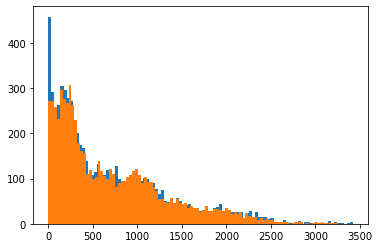

In [23]:
plt.hist(bike_count_labels, bins=100)
plt.hist(forest_bike_pred, bins = 100)
plt.show()

## 6. Fine-tuning of the model

### 6.1. Grid search

Now that we have found a model that looks promising (random forest) it is time to find the best set of hyperparameters for our model. In this case, we can use various alternatives, including **grid search** and **randomized search**. For this example, we will be using the former.

Looking at the results for the grid search, we improved the **RMSE** and got a value of 237.53. when we observe the feature importance, we get the attributes associated with the hour are the least important; however, since we want to predict the demand by the hour, we will not remove them. 

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[40, 45, 50], 'max_features':[15, 16, 17, 18, 19, 20]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(bike_prepared, bike_count_labels)

grid_search.best_params_

{'max_features': 20, 'n_estimators': 50}

In [25]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

240.72088103712125 {'max_features': 15, 'n_estimators': 40}
241.56268780114797 {'max_features': 15, 'n_estimators': 45}
239.4167959635331 {'max_features': 15, 'n_estimators': 50}
240.8534059119795 {'max_features': 16, 'n_estimators': 40}
241.1778691983095 {'max_features': 16, 'n_estimators': 45}
240.1210789782961 {'max_features': 16, 'n_estimators': 50}
241.01047399910235 {'max_features': 17, 'n_estimators': 40}
239.97517499642979 {'max_features': 17, 'n_estimators': 45}
239.16082046598981 {'max_features': 17, 'n_estimators': 50}
239.83144053694588 {'max_features': 18, 'n_estimators': 40}
239.61695149480622 {'max_features': 18, 'n_estimators': 45}
239.92087501102722 {'max_features': 18, 'n_estimators': 50}
240.27069775846425 {'max_features': 19, 'n_estimators': 40}
242.36403625877026 {'max_features': 19, 'n_estimators': 45}
239.0213192886211 {'max_features': 19, 'n_estimators': 50}
242.25908800023421 {'max_features': 20, 'n_estimators': 40}
240.5824740636072 {'max_features': 20, 'n_est

### 6.2. Feature importance

In [26]:
feature_importances = grid_search.best_estimator_.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.24925523435485936, 'temperature'),
 (0.11892072895820302, 'humidity'),
 (0.06868069921827176, 18),
 (0.06009045183113895, 'solar_radiation'),
 (0.055163448744503345, 'dew_point'),
 (0.0327626219972338, 19),
 (0.028420059613568065, 21),
 (0.027625856729633743, 'rainfall'),
 (0.02708803371132146, 20),
 (0.02464708472882059, 'wind_speed'),
 (0.024150065562431888, 'visibility'),
 (0.021775564006770304, 17),
 (0.020669664758574534, 22),
 (0.017360559924392078, 8),
 (0.0129605654461304, 4),
 (0.010173976545120967, 5),
 (0.008343711223862616, 23),
 (0.0062534912228521785, 3),
 (0.006118249221910772, 16),
 (0.003802775082124766, 2),
 (0.0036395654953332007, 7),
 (0.0035982975070102136, 0),
 (0.003232067441822936, 6),
 (0.002643936093809061, 10),
 (0.0020803645999142406, 1),
 (0.0017573523372114424, 15),
 (0.0010371033137319388, 11),
 (0.0009688555368639241, 9),
 (0.0005199503824870223, 'snowfall'),
 (0.0004299681395659959, 14),
 (0.0003555204550505528, 13),
 (0.0003067776133455992, 12)]

### 6.3. Evaluate results on the test set

The final step is to evaluate the performance of our system on the test set. The process consists of transforming the test data using our full pipeline and then make predictions using our final model. The **final RMSE** is 244.62 which is not too far from our train results. 

In [27]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("bike_count", axis=1)
y_test = test_set["bike_count"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

244.42099470392225

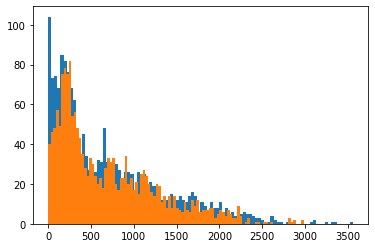

In [28]:
plt.hist(y_test, bins=100)
plt.hist(final_predictions, bins=100)
plt.show()

In [29]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([228.46763229, 259.39503908])

## 7. Conclussion 

We presented all the necessary steps to build a system that makes predictions based on observed attributes. We also showed various ways to improve the system by evaluating the results. Further steps should include launch, monitoring and maintenance of the system.